In [258]:
import pandas as pd

# Load the training data
training_data_path = 'training_data.csv'
training_data = pd.read_csv(training_data_path)

# Display the first few rows of the data and the summary statistics
training_data.head(), training_data.describe()

c:\Users\Anik\anaconda3\envs\tfgpu\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (31,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(                general_sector           city  zip_code  \
 0                      Retired       MISSOULA   59802.0   
 1                      Retired  CLEVELAND HTS   44118.0   
 2         Public Sector Unions         NEWARK       NaN   
 3                      Retired        BOZEMAN   59715.0   
 4  No Employer Listed or Found    ORANGE PARK   32003.0   
 
                     specific_sector state contributor_type  winner_ratio  \
 0                           Retired    MT       Individual           1.0   
 1                           Retired    OH       Individual           0.5   
 2                   Teachers unions    NJ   Non-Individual           1.0   
 3                           Retired    MT       Individual           1.0   
 4  No employer listed or discovered    FL       Individual           0.0   
 
    candidacy_count  candidacy_democratic_count  candidacy_republican_count  \
 0                4                           4                           0   
 1              

In [259]:
training_data.dtypes

general_sector                                    object
city                                              object
zip_code                                         float64
specific_sector                                   object
state                                             object
contributor_type                                  object
winner_ratio                                     float64
candidacy_count                                    int64
candidacy_democratic_count                         int64
candidacy_republican_count                         int64
contribution_count                                 int64
contribution_democratic_count                      int64
contribution_republican_count                      int64
politician_challenger_count                        int64
politician_count                                   int64
politician_democratic_count                        int64
politician_incumbency_count                        int64
politician_open_pos_count      

In [260]:
training_data.isnull().sum()

general_sector                                      0
city                                             1468
zip_code                                         3929
specific_sector                                     0
state                                               0
contributor_type                                    0
winner_ratio                                        0
candidacy_count                                     0
candidacy_democratic_count                          0
candidacy_republican_count                          0
contribution_count                                  0
contribution_democratic_count                       0
contribution_republican_count                       0
politician_challenger_count                         0
politician_count                                    0
politician_democratic_count                         0
politician_incumbency_count                         0
politician_open_pos_count                           0
politician_republican_count 

In [261]:
training_data = training_data.dropna()

In [262]:
training_data.isnull().sum()

general_sector                                   0
city                                             0
zip_code                                         0
specific_sector                                  0
state                                            0
contributor_type                                 0
winner_ratio                                     0
candidacy_count                                  0
candidacy_democratic_count                       0
candidacy_republican_count                       0
contribution_count                               0
contribution_democratic_count                    0
contribution_republican_count                    0
politician_challenger_count                      0
politician_count                                 0
politician_democratic_count                      0
politician_incumbency_count                      0
politician_open_pos_count                        0
politician_republican_count                      0
contribution_democratic_sum_201

In [263]:
categorical_cols = ['governor_contribution_ratio','senate_contribution_ratio','us_senate_contribution_ratio','general_sector','city','specific_sector','contributor_type']
training_data[categorical_cols].head(10)

,governor_contribution_ratio,senate_contribution_ratio,us_senate_contribution_ratio,general_sector,city,specific_sector,contributor_type
0,0.5,0.0,0.0,Retired,MISSOULA,Retired,Individual
1,0.0,0.0,0.0,Retired,CLEVELAND HTS,Retired,Individual
3,0.6,0.2,0.0,Retired,BOZEMAN,Retired,Individual
4,1.0,0.0,0.0,No Employer Listed or Found,ORANGE PARK,No employer listed or discovered,Individual
5,1.0,0.0,0.0,Uncoded,JACKSON,Uncoded,Individual
6,0.0,0.0,0.077716,Lawyers & Lobbyists,PORTLAND,Attorneys & law firms,Individual
7,0.882844,0.0,0.0,Lawyers & Lobbyists,SWANQUARTER,Attorneys & law firms,Individual
8,0.0,0.0,0.416645,Lawyers & Lobbyists,ALEXANDRIA,Lobbyists & public relations,Individual
9,0.090789,0.268022,0.0,Retired,PUEBLO,Retired,Individual
10,0.0,0.0,0.73066,Miscellaneous Manufacturing & Distributing,BROOKLINE,Jewelry,Individual


In [264]:
categorical_cols_needs_casting = ['governor_contribution_ratio','senate_contribution_ratio','us_senate_contribution_ratio']
training_data[categorical_cols_needs_casting] = training_data[categorical_cols_needs_casting].astype('float64')

In [265]:
training_data[categorical_cols_needs_casting]

,governor_contribution_ratio,senate_contribution_ratio,us_senate_contribution_ratio
0,0.50000,0.0,0.0
1,0.00000,0.0,0.0
3,0.60000,0.2,0.0
4,1.00000,0.0,0.0
5,1.00000,0.0,0.0
...,...,...,...
172843,0.00000,1.0,0.0
172844,0.00000,0.0,0.0
172845,0.00000,1.0,0.0
172846,1.00000,0.0,0.0


In [266]:
categorical_cols = ['general_sector','city','specific_sector','contributor_type'] 
unique_sector = training_data.groupby('general_sector').nunique()

In [267]:
test_data = pd.read_csv('test_data.csv')

In [268]:
from sklearn.preprocessing import LabelEncoder

combined_general_sector = pd.concat([training_data['general_sector'], test_data['general_sector']])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the combined data
label_encoder.fit(combined_general_sector)

# Transform 'general_sector' in both training and test datasets
training_data['general_sector'] = label_encoder.transform(training_data['general_sector'])
test_data['general_sector'] = label_encoder.transform(test_data['general_sector'])

In [269]:
training_data[['general_sector']].head(), test_data[['general_sector']].head()

(   general_sector
 0             110
 1             110
 3             110
 4              89
 5             128,
    general_sector
 0              45
 1             128
 2              66
 3             110
 4             128)

In [270]:
#same for this field aswell 
combined_specific_sector = pd.concat([training_data['specific_sector'], test_data['specific_sector']])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the combined data
label_encoder.fit(combined_specific_sector)

# Transform 'general_sector' in both training and test datasets
training_data['specific_sector'] = label_encoder.transform(training_data['specific_sector'])
test_data['specific_sector'] = label_encoder.transform(test_data['specific_sector'])

training_data[['specific_sector']].head(), test_data[['specific_sector']].head()

(   specific_sector
 0              344
 1              344
 3              344
 4              254
 5              396,
    specific_sector
 0              341
 1              396
 2              215
 3              344
 4              396)

In [271]:
#same for this field aswell 
combined_specific_sector = pd.concat([training_data['contributor_type'], test_data['contributor_type']])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the combined data
label_encoder.fit(combined_specific_sector)

# Transform 'general_sector' in both training and test datasets
training_data['contributor_type'] = label_encoder.transform(training_data['contributor_type'])
test_data['contributor_type'] = label_encoder.transform(test_data['contributor_type'])

training_data[['contributor_type']].head(), test_data[['contributor_type']].head()

(   contributor_type
 0                 0
 1                 0
 3                 0
 4                 0
 5                 0,
    contributor_type
 0                 0
 1                 0
 2                 0
 3                 0
 4                 1)

In [272]:
#same for this field aswell 
combined_city = pd.concat([training_data['city'], test_data['city']])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the combined data
label_encoder.fit(combined_city)

# Transform 'general_sector' in both training and test datasets
training_data['city'] = label_encoder.transform(training_data['city'])
test_data['city'] = label_encoder.transform(test_data['city'])

training_data[['city']].head(), test_data[['city']].head()

(   city
 0  5988
 1  1823
 3  1007
 4  6956
 5  4506,
    city
 0  4744
 1  1703
 2   268
 3  5851
 4  7953)

In [273]:
#same for this field aswell 
combined_specific_sector = pd.concat([training_data['state'], test_data['state']])

# Initialize the LabelEncoder
label_encoder_state = LabelEncoder()

# Fit the label encoder on the combined data
label_encoder_state.fit(combined_specific_sector)

# Transform 'general_sector' in both training and test datasets
training_data['state'] = label_encoder_state.transform(training_data['state'])
test_data['state'] = label_encoder_state.transform(test_data['state'])

training_data[['state']].head(), test_data[['state']].head()

(   state
 0     23
 1     32
 3     23
 4      8
 5     24,
    state
 0     24
 1     28
 2     11
 3      8
 4     28)

In [274]:
import pandas as pd

# Assuming you have loaded your dataset into a variable called 'data'
# Calculate the correlation matrix
correlation_matrix = training_data.corr()

# Extract the correlations with 'winner_ratio'
winner_ratio_correlations = correlation_matrix['winner_ratio']


In [275]:
winner_ratio_correlations

general_sector                                  -0.044179
city                                            -0.003983
zip_code                                        -0.014837
specific_sector                                 -0.041025
state                                            0.030899
contributor_type                                 0.110257
winner_ratio                                     1.000000
candidacy_count                                  0.057898
candidacy_democratic_count                       0.046185
candidacy_republican_count                       0.056256
contribution_count                               0.022378
contribution_democratic_count                    0.023268
contribution_republican_count                    0.016577
politician_challenger_count                     -0.121476
politician_count                                 0.061041
politician_democratic_count                      0.044482
politician_incumbency_count                      0.112664
politician_ope

In [276]:
training_data.dtypes

general_sector                                     int32
city                                               int32
zip_code                                         float64
specific_sector                                    int32
state                                              int32
contributor_type                                   int32
winner_ratio                                     float64
candidacy_count                                    int64
candidacy_democratic_count                         int64
candidacy_republican_count                         int64
contribution_count                                 int64
contribution_democratic_count                      int64
contribution_republican_count                      int64
politician_challenger_count                        int64
politician_count                                   int64
politician_democratic_count                        int64
politician_incumbency_count                        int64
politician_open_pos_count      

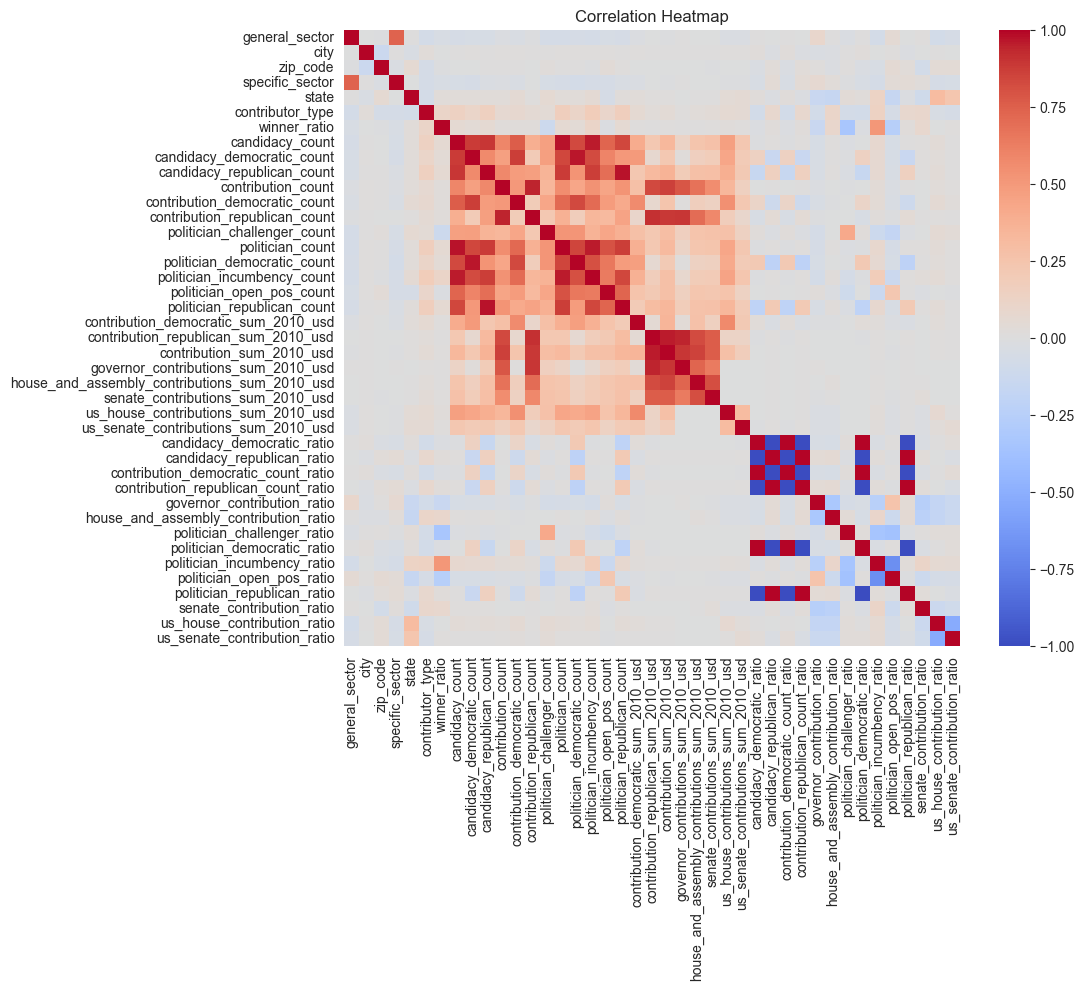

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = training_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [278]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(training_data)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF for each feature
print(vif_data)

c:\Users\Anik\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\Anik\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                          feature           VIF
0                                           const  0.000000e+00
1                                  general_sector  2.253345e+00
2                                            city  1.024998e+00
3                                        zip_code  1.039754e+00
4                                 specific_sector  2.208323e+00
5                                           state  1.566931e+00
6                                contributor_type  1.104499e+00
7                                    winner_ratio  1.429068e+00
8                                 candidacy_count  1.271861e+08
9                      candidacy_democratic_count  3.643447e+06
10                     candidacy_republican_count  1.833297e+08
11                             contribution_count  8.093855e+07
12                  contribution_democratic_count  1.246996e+06
13                  contribution_republican_count  8.368709e+06
14                    politician_challen

In [279]:
high_vif_features = vif_data[vif_data['VIF'] > 12]['feature']
high_vif_features

8                          candidacy_count
9               candidacy_democratic_count
10              candidacy_republican_count
11                      contribution_count
12           contribution_democratic_count
13           contribution_republican_count
15                        politician_count
16             politician_democratic_count
17             politician_incumbency_count
18               politician_open_pos_count
19             politician_republican_count
20    contribution_democratic_sum_2010_usd
21    contribution_republican_sum_2010_usd
22               contribution_sum_2010_usd
23     governor_contributions_sum_2010_usd
28              candidacy_democratic_ratio
29              candidacy_republican_ratio
30     contribution_democratic_count_ratio
31     contribution_republican_count_ratio
35             politician_democratic_ratio
36             politician_incumbency_ratio
37               politician_open_pos_ratio
38             politician_republican_ratio
Name: featu

In [280]:
training_data

,general_sector,city,zip_code,specific_sector,state,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,...,governor_contribution_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
0,110,5988,59802.0,344,23,0,1.0,4,4,0,...,0.50000,0.000000,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0
1,110,1823,44118.0,344,32,0,0.5,2,2,0,...,0.00000,0.216202,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0
3,110,1007,59715.0,344,23,0,1.0,4,4,0,...,0.60000,0.200000,0.0,1.0,0.5,0.5,0.0,0.2,0.0,0.0
4,89,6956,32003.0,254,8,0,0.0,4,4,0,...,1.00000,0.000000,0.5,1.0,0.0,0.5,0.0,0.0,0.0,0.0
5,128,4506,27845.0,396,24,0,1.0,2,2,0,...,1.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172843,112,3033,6825.0,348,5,0,1.0,2,0,2,...,0.00000,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
172844,128,430,78733.0,396,7,0,1.0,2,2,0,...,0.00000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
172845,128,7178,7442.0,396,28,1,1.0,2,0,2,...,0.00000,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
172846,128,6471,70122.0,396,17,0,0.0,2,0,2,...,1.00000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [281]:
training_data.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_rat

In [282]:
training_data.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_rat

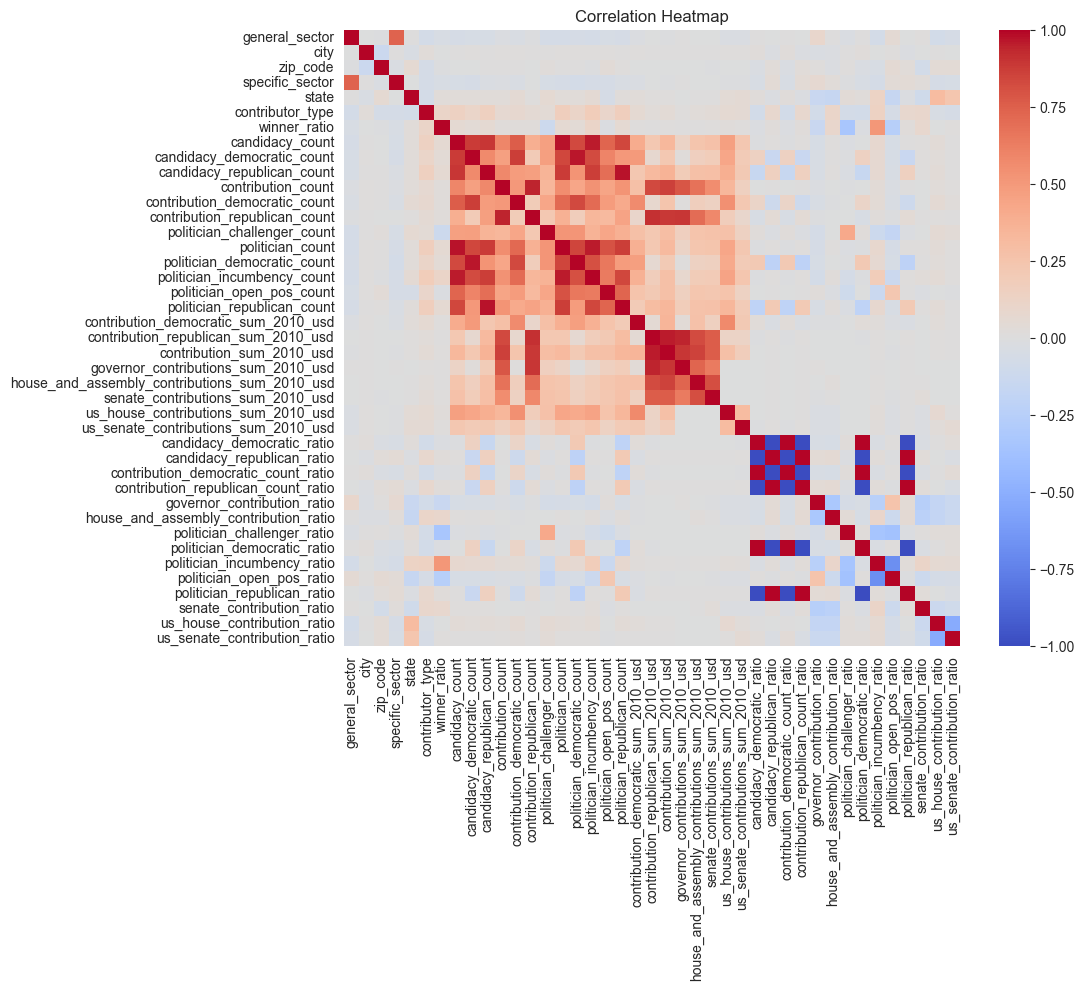

In [283]:
cor = training_data.corr()
#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [284]:
cols_to_remove = [#'candidacy_count',
 'candidacy_democratic_count',
 'candidacy_republican_count',
 #'contribution_count',
 'contribution_democratic_count',
 'contribution_republican_count',
 #'politician_count',
 'politician_democratic_count',
 'politician_incumbency_count',
 'politician_open_pos_count',
 'politician_republican_count']
cols_to_remove

['candidacy_democratic_count',
 'candidacy_republican_count',
 'contribution_democratic_count',
 'contribution_republican_count',
 'politician_democratic_count',
 'politician_incumbency_count',
 'politician_open_pos_count',
 'politician_republican_count']

In [285]:
training_data.drop(cols_to_remove,axis=1,inplace=True)
test_data.drop(cols_to_remove,axis=1,inplace=True)

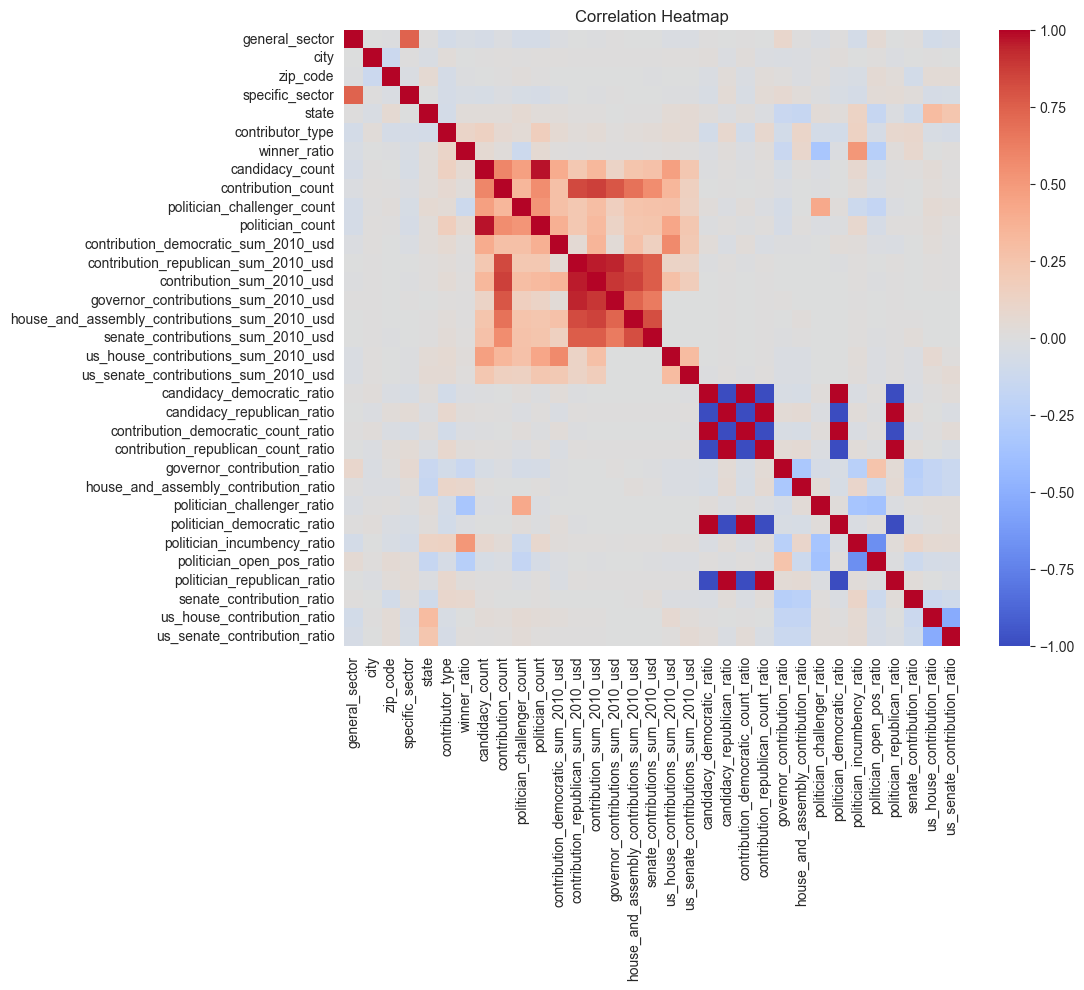

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = training_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [287]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(training_data)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF for each feature
print(vif_data)

c:\Users\Anik\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\Anik\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                          feature           VIF
0                                           const  0.000000e+00
1                                  general_sector  2.252831e+00
2                                            city  1.025058e+00
3                                        zip_code  1.038462e+00
4                                 specific_sector  2.204979e+00
5                                           state  1.562964e+00
6                                contributor_type  1.096723e+00
7                                    winner_ratio  1.428397e+00
8                                 candidacy_count  2.495089e+01
9                              contribution_count  1.236981e+01
10                    politician_challenger_count  2.089520e+00
11                               politician_count  2.061015e+01
12           contribution_democratic_sum_2010_usd           inf
13           contribution_republican_sum_2010_usd           inf
14                      contribution_sum

In [288]:
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature']
high_vif_features

8                                   candidacy_count
9                                contribution_count
11                                 politician_count
12             contribution_democratic_sum_2010_usd
13             contribution_republican_sum_2010_usd
14                        contribution_sum_2010_usd
15              governor_contributions_sum_2010_usd
16    house_and_assembly_contributions_sum_2010_usd
20                       candidacy_democratic_ratio
21                       candidacy_republican_ratio
22              contribution_democratic_count_ratio
23              contribution_republican_count_ratio
27                      politician_democratic_ratio
30                      politician_republican_ratio
Name: feature, dtype: object

In [289]:
cols_to_remove_updated = [
    'contribution_democratic_sum_2010_usd',
    'contribution_republican_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd'
]

In [290]:
training_data.drop(cols_to_remove_updated,axis=1,inplace=True)
test_data.drop(cols_to_remove_updated,axis=1,inplace=True)

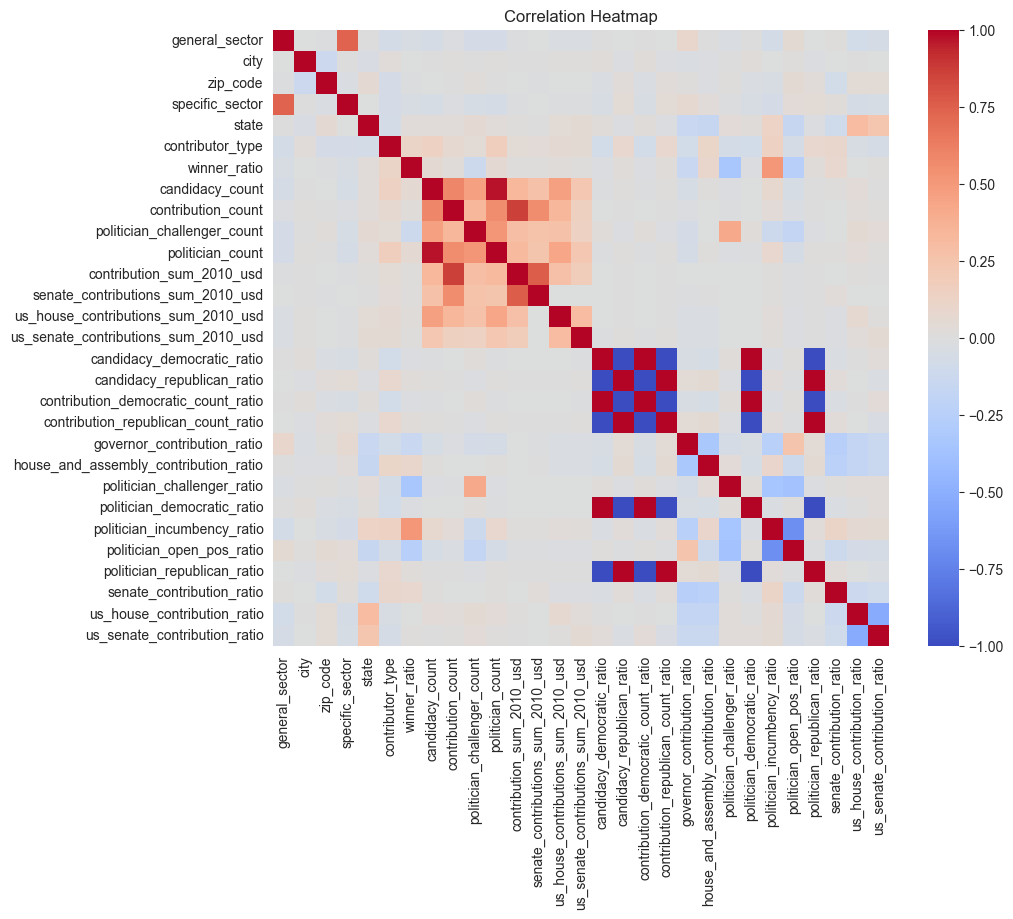

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = training_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [292]:
Q1 = training_data.quantile(0.25)
Q3 = training_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((training_data < (Q1 - 1.5 * IQR)) | (training_data > (Q3 + 1.5 * IQR))).sum()

outliers

general_sector                               0
city                                         0
zip_code                                     0
specific_sector                              0
state                                        0
contributor_type                         26045
winner_ratio                                 0
candidacy_count                          22833
contribution_count                       17931
politician_challenger_count               9428
politician_count                         19108
contribution_sum_2010_usd                21637
senate_contributions_sum_2010_usd        33434
us_house_contributions_sum_2010_usd      27894
us_senate_contributions_sum_2010_usd     23830
candidacy_democratic_ratio                   0
candidacy_republican_ratio                   0
contribution_democratic_count_ratio          0
contribution_republican_count_ratio          0
governor_contribution_ratio                 19
house_and_assembly_contribution_ratio       31
politician_ch

In [293]:
training_data.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_challenger_count', 'politician_count',
       'contribution_sum_2010_usd', 'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio'],
      dtype='object')

In [294]:
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    """
    Caps outliers to the specified lower and upper percentiles.
    """
    lower_limit = series.quantile(lower_percentile / 100.0)
    upper_limit = series.quantile(upper_percentile / 100.0)
    series_capped = series.clip(lower_limit, upper_limit)
    return series_capped

# Apply the capping function to the 'contribution_sum_2010_usd' column
training_data['contribution_sum_2010_usd_capped'] = cap_outliers(training_data['contribution_sum_2010_usd'])
training_data['contributor_type_capped'] = cap_outliers(training_data['contributor_type'])
training_data['candidacy_count_capped'] = cap_outliers(training_data['candidacy_count'])
training_data['contribution_count_capped'] = cap_outliers(training_data['contribution_count'])
training_data['politician_challenger_count_capped'] = cap_outliers(training_data['politician_challenger_count'])
training_data['politician_count_capped'] = cap_outliers(training_data['politician_count'])
training_data['senate_contributions_sum_2010_usd_capped'] = cap_outliers(training_data['senate_contributions_sum_2010_usd'])
training_data['us_house_contributions_sum_2010_usd_capped'] = cap_outliers(training_data['us_house_contributions_sum_2010_usd'])
training_data['us_senate_contributions_sum_2010_usd_capped'] = cap_outliers(training_data['us_senate_contributions_sum_2010_usd'])
training_data['politician_challenger_ratio_capped'] = cap_outliers(training_data['politician_challenger_ratio'])
training_data['senate_contribution_ratio_capped'] = cap_outliers(training_data['senate_contribution_ratio'])
training_data['us_house_contribution_ratio_capped'] = cap_outliers(training_data['us_house_contribution_ratio'])
training_data['us_senate_contribution_ratio_capped'] = cap_outliers(training_data['us_senate_contribution_ratio'])



In [295]:
training_data.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_challenger_count', 'politician_count',
       'contribution_sum_2010_usd', 'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contribution_sum_2010_usd_capped',
       'contributor_type_capped', 'candidacy_count_capped',
       'contributio

In [296]:
test_data['contribution_sum_2010_usd_capped'] = cap_outliers(test_data['contribution_sum_2010_usd'])
test_data['contributor_type_capped'] = cap_outliers(test_data['contributor_type'])
test_data['candidacy_count_capped'] = cap_outliers(test_data['candidacy_count'])
test_data['contribution_count_capped'] = cap_outliers(test_data['contribution_count'])
test_data['politician_challenger_count_capped'] = cap_outliers(test_data['politician_challenger_count'])
test_data['politician_count_capped'] = cap_outliers(test_data['politician_count'])
test_data['senate_contributions_sum_2010_usd_capped'] = cap_outliers(test_data['senate_contributions_sum_2010_usd'])
test_data['us_house_contributions_sum_2010_usd_capped'] = cap_outliers(test_data['us_house_contributions_sum_2010_usd'])
test_data['us_senate_contributions_sum_2010_usd_capped'] = cap_outliers(test_data['us_senate_contributions_sum_2010_usd'])
test_data['politician_challenger_ratio_capped'] = cap_outliers(test_data['politician_challenger_ratio'])
test_data['senate_contribution_ratio_capped'] = cap_outliers(test_data['senate_contribution_ratio'])
test_data['us_house_contribution_ratio_capped'] = cap_outliers(test_data['us_house_contribution_ratio'])
test_data['us_senate_contribution_ratio_capped'] = cap_outliers(test_data['us_senate_contribution_ratio'])

In [297]:
cols = ['contribution_sum_2010_usd','contributor_type','candidacy_count','contribution_count','politician_challenger_count','politician_count','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd','us_senate_contributions_sum_2010_usd','politician_challenger_ratio','senate_contribution_ratio','us_house_contribution_ratio','us_senate_contribution_ratio']
training_data.drop(cols,axis=1,inplace=True)

In [298]:
cols = ['contribution_sum_2010_usd','contributor_type','candidacy_count','contribution_count','politician_challenger_count','politician_count','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd','us_senate_contributions_sum_2010_usd','politician_challenger_ratio','senate_contribution_ratio','us_house_contribution_ratio','us_senate_contribution_ratio']
test_data.drop(cols,axis=1,inplace=True)

In [299]:
training_data[['contribution_sum_2010_usd_capped', 'us_senate_contributions_sum_2010_usd_capped', 'senate_contributions_sum_2010_usd_capped']]

,contribution_sum_2010_usd_capped,us_senate_contributions_sum_2010_usd_capped,senate_contributions_sum_2010_usd_capped
0,350.00,0.0,0.0
1,154.67,0.0,0.0
3,250.00,0.0,50.0
4,146.06,0.0,0.0
5,854.50,0.0,0.0
...,...,...,...
172843,466.20,0.0,466.2
172844,1238.68,0.0,0.0
172845,946.50,0.0,946.5
172846,237.08,0.0,0.0


In [300]:
training_data.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'winner_ratio', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_democratic_ratio',
       'politician_incumbency_ratio', 'politician_open_pos_ratio',
       'politician_republican_ratio', 'contribution_sum_2010_usd_capped',
       'contributor_type_capped', 'candidacy_count_capped',
       'contribution_count_capped', 'politician_challenger_count_capped',
       'politician_count_capped', 'senate_contributions_sum_2010_usd_capped',
       'us_house_contributions_sum_2010_usd_capped',
       'us_senate_contributions_sum_2010_usd_capped',
       'politician_challenger_ratio_capped',
       'senate_contribution_ratio_capped',
       'us_house_contribution_ratio_capped',
       'us_senate_contribution_ratio_capped'],
  

In [301]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

pca = PCA(n_components=1)  # we reduce to 1 principal component for the sake of the example
principal_components_train = pca.fit_transform(training_data[['contribution_sum_2010_usd_capped', 'us_senate_contributions_sum_2010_usd_capped', 'senate_contributions_sum_2010_usd_capped']])
principal_components_test = pca.transform(test_data[['contribution_sum_2010_usd_capped', 'us_senate_contributions_sum_2010_usd_capped', 'senate_contributions_sum_2010_usd_capped']])

# Adding the principal component to the dataframes
training_data['PCA_Feature'] = principal_components_train
test_data['PCA_Feature'] = principal_components_test

#2
training_data['politician_ratio_interaction'] = training_data['politician_democratic_ratio'] * training_data['politician_republican_ratio']
test_data['politician_ratio_interaction'] = test_data['politician_democratic_ratio'] * test_data['politician_republican_ratio']

# 3. Aggregate Features
training_data['total_contributions_capped'] = training_data[['contribution_sum_2010_usd_capped','senate_contributions_sum_2010_usd_capped','us_house_contributions_sum_2010_usd_capped','us_senate_contributions_sum_2010_usd_capped']].sum(axis=1)
test_data['total_contributions_capped'] = test_data[['contribution_sum_2010_usd_capped','senate_contributions_sum_2010_usd_capped','us_house_contributions_sum_2010_usd_capped','us_senate_contributions_sum_2010_usd_capped']].sum(axis=1)


# 4. Ratios of Sums and Counts
training_data['gov_house_ratio'] = training_data['governor_contribution_ratio'] / (training_data['house_and_assembly_contribution_ratio'] + 0.01)
test_data['gov_house_ratio'] = test_data['governor_contribution_ratio'] / (test_data['house_and_assembly_contribution_ratio'] + 0.01)

# 5. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly_features = poly.fit_transform(training_data[['contribution_sum_2010_usd_capped']])
test_poly_features = poly.transform(test_data[['contribution_sum_2010_usd_capped']])

# Only include the squared term as a new feature
training_data['contribution_sum_2010_usd_capped_squared'] = train_poly_features[:, 1]
test_data['contribution_sum_2010_usd_capped_squared'] = test_poly_features[:, 1]

training_data.drop(['senate_contributions_sum_2010_usd_capped','us_house_contributions_sum_2010_usd_capped','us_senate_contributions_sum_2010_usd_capped'],axis=1,inplace=True)
test_data.drop(['senate_contributions_sum_2010_usd_capped','us_house_contributions_sum_2010_usd_capped','us_senate_contributions_sum_2010_usd_capped'],axis=1,inplace=True)

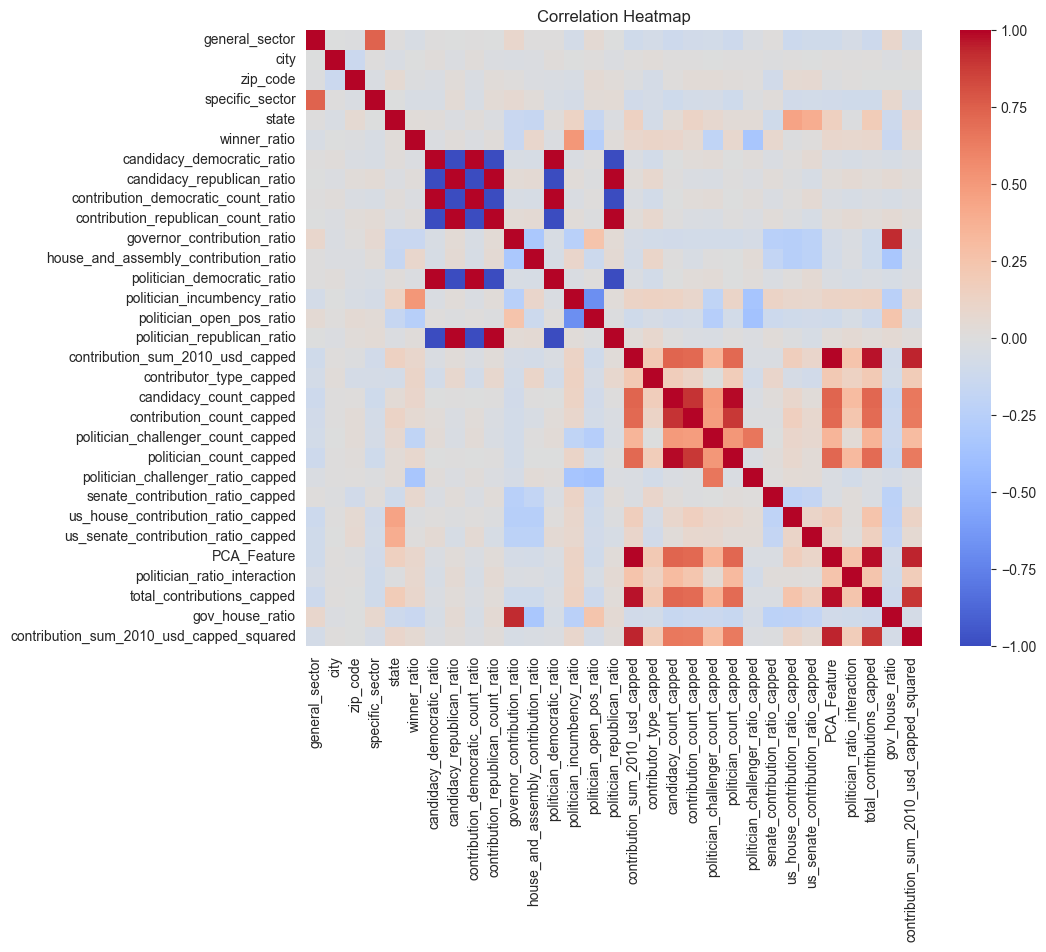

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = training_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [303]:
training_data.columns


Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'winner_ratio', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_democratic_ratio',
       'politician_incumbency_ratio', 'politician_open_pos_ratio',
       'politician_republican_ratio', 'contribution_sum_2010_usd_capped',
       'contributor_type_capped', 'candidacy_count_capped',
       'contribution_count_capped', 'politician_challenger_count_capped',
       'politician_count_capped', 'politician_challenger_ratio_capped',
       'senate_contribution_ratio_capped',
       'us_house_contribution_ratio_capped',
       'us_senate_contribution_ratio_capped', 'PCA_Feature',
       'politician_ratio_interaction', 'total_contributions_capped',
       'gov_house_ratio', 'contribution_sum_2010_usd_capped_squared'],
      

In [ ]:
# col =['candidacy_count','contribution_count','']
# training_data.drop(col,axis=1,inplace=True)

In [305]:
training_data.shape

(168686, 31)

In [306]:
test_data.shape
#test_data.drop(cols,axis=1,inplace=True)

(115232, 31)

In [307]:
y = training_data['winner_ratio']
X = training_data.drop('winner_ratio',axis=1)

In [308]:
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and labels respectively
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [309]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [312]:
# Initialize the XGBoost regressor
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=11,random_state=42)

# Train the model
xgb_model_1.fit(X_train, y_train)

# Predict on the test set
xgb_predictions_1 = xgb_model_1.predict(X_val)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_val, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")

XGBoost MSE: 0.0765821585774434


In [313]:
xgb_predictions_1 = xgb_model_1.predict(X_test)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_test, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")


XGBoost MSE: 0.07893369035879666


In [72]:
# prediction_df = pd.DataFrame(xgb_predictions_1, index=test_data.index, columns=['index','winner_ratio'])

# prediction_df.to_csv("sub6.csv")

ValueError: Shape of passed values is (16869, 1), indices imply (115232, 1)

In [73]:
X_train

,general_sector,city,zip_code,state,contributor_type,candidacy_count,politician_challenger_count,contribution_democratic_sum_2010_usd,contribution_republican_sum_2010_usd,governor_contributions_sum_2010_usd,...,governor_contribution_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
23370,66,10181,33401.0,41,0,2,1,1766.40,0.00,0.00,...,0.000000,0.000000,0.5,1.0,0.500000,0.000000,0.0,0.000000,0.424592,0.575408
78102,128,3447,27529.0,24,0,4,0,684.84,0.00,0.00,...,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
113674,89,417,13021.0,31,0,4,0,0.00,70.00,50.00,...,0.714286,0.000000,0.0,0.0,0.500000,0.500000,1.0,0.285714,0.000000,0.000000
7919,101,8496,98177.0,41,0,2,0,1058.67,0.00,0.00,...,0.000000,0.000000,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.646339,0.353661
126762,128,1703,60603.0,13,0,3,0,0.00,5252.83,4759.12,...,0.906011,0.000000,0.0,0.0,0.666667,0.333333,1.0,0.093989,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122798,128,7892,23238.0,43,0,2,0,0.00,1391.99,0.00,...,0.000000,1.000000,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
106204,14,6500,10128.0,31,0,2,0,0.00,61574.40,61574.40,...,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
135156,3,10447,6798.0,5,0,2,0,0.00,1070.16,1070.16,...,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
150477,20,10006,6795.0,5,0,6,0,0.00,2707.46,2060.04,...,0.760876,0.098816,0.0,0.0,0.666667,0.333333,1.0,0.140309,0.000000,0.000000


In [75]:
# xgb_predictions = xgb_model.predict(X_test)

# # Calculate MSE
# xgb_mse = mean_squared_error(y_test, xgb_predictions)
# print(f"XGBoost MSE: {xgb_mse}")

XGBoost MSE: 0.07686031015501518


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
# # Define the parameter grid
# xgb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.5, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9, 11,13],
#     'subsample': [0.6,0.8,1]
# }

# # Create the GridSearchCV object
# xgb_grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# # Fit the grid search to the data
# xgb_grid_search.fit(X_train, y_train)

# # Print the best parameters and best score (MSE)
# print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
# print("Best score (MSE) for XGBoost:", -xgb_grid_search.best_score_)

In [314]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data for winning candidates and state bipartite weighted network
winning_candidates_network_df = pd.read_csv('winning_candidates_state_bipartite_weighted_network.csv')

# Display the first few rows of the DataFrame
winning_candidates_network_df.head()


,Unnamed: 0,Unnamed: 1,ZZ,WA,WV,DE,DC,WI,NO,HI,...,KS,MT,UN,SN,MS,PR,SC,KY,OR,SD
0,"BINDER, LINDA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"MOLINARO, MARCUS J",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"BIXBY, NORMA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.09996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"HALL III, ISADORE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"TAM, ROD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
winning_candidates_network_df.drop('Unnamed: 1',axis=1,inplace=True)

In [316]:
winning_candidates_network_df['candidate'] = winning_candidates_network_df['Unnamed: 0']
winning_candidates_network_df.drop('Unnamed: 0',axis=1,inplace=True)

winning_candidates_network_df.head()

,ZZ,WA,WV,DE,DC,WI,NO,HI,FL,WY,...,MT,UN,SN,MS,PR,SC,KY,OR,SD,candidate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"BINDER, LINDA"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MOLINARO, MARCUS J"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.09996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"BIXBY, NORMA"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"HALL III, ISADORE"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"TAM, ROD"


In [317]:
winning_candidates_network_df.drop(['ZZ','NO','CH','ON','BI','VQ','MC','SN','NB','VI','XX','PR','DC'],axis=1,inplace=True)

In [318]:
winning_candidates_network_df.columns

Index(['WA', 'WV', 'DE', 'WI', 'HI', 'FL', 'WY', 'NH', 'NJ', 'NM', 'TX', 'LA',
       'NC', 'ND', 'NE', 'TN', 'NY', 'PA', 'CA', 'NV', 'VA', 'CO', 'AK', 'AL',
       'AR', 'VT', 'IL', 'GA', 'IN', 'IA', 'OK', 'AZ', 'ID', 'CT', 'ME', 'MD',
       'MA', 'OH', 'UT', 'MO', 'MN', 'MI', 'RI', 'KS', 'MT', 'UN', 'MS', 'SC',
       'KY', 'OR', 'SD', 'candidate'],
      dtype='object')

In [319]:
# Let's load the dataset and calculate centrality for the graph
#winning_candidates_network_df = pd.read_csv('/mnt/data/winning_candidates_state_bipartite_weighted_network.csv')

# Initialize a new graph
B = nx.Graph()

# Since 'states' are columns, we get a list of them from the dataframe, excluding the 'candidate' column
states = [col for col in winning_candidates_network_df.columns if col != 'candidate']

# Add candidate nodes to the graph with the bipartite attribute 0
candidates = winning_candidates_network_df['candidate'].unique()
B.add_nodes_from(candidates, bipartite=0)

# Add state nodes to the graph with the bipartite attribute 1
B.add_nodes_from(states, bipartite=1)

# Add edges with weights
# Loop through the DataFrame rows as dictionaries
for _, row in winning_candidates_network_df.iterrows():
    candidate = row['candidate']
    # Loop through each state and create an edge if the weight is not null or NaN
    for state in states:
        weight = row[state]
        if pd.notnull(weight) and weight!=0:  # This checks for NaN and None
            B.add_edge(candidate, state, weight=weight)

# Calculate degree centrality of the nodes in the graph
centrality = nx.degree_centrality(B)
# Displaying a sample of the centrality dictionary
print(dict(list(centrality.items())[0:5]))  # Print first 5 entries

# To provide a more detailed view, we could sort the centrality values
sorted_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1], reverse=True)}
print("\nTop 5 nodes by degree centrality:")
for candidate, centr in list(sorted_centrality.items())[:5]:
    print(candidate, centr)


{'BINDER, LINDA': 9.611687812379854e-05, 'MOLINARO, MARCUS J': 9.611687812379854e-05, 'BIXBY, NORMA': 9.611687812379854e-05, 'HALL III, ISADORE': 0.0002883506343713956, 'TAM, ROD': 0.00019223375624759708}

Top 5 nodes by degree centrality:
NC 0.20857362552864284
VA 0.14898116109188775
TX 0.14052287581699346
FL 0.1187043444828912
CA 0.09496347558631296


In [320]:
centrality_df = pd.DataFrame(list(centrality.items()), columns=['State', 'Degree_Centrality_Wining'])
centrality_df = centrality_df[centrality_df['State'].isin(states)]
centrality_df

,State,Degree_Centrality_Wining
10354,WA,0.055363
10355,WV,0.000673
10356,DE,0.002018
10357,WI,0.003172
10358,HI,0.007017
10359,FL,0.118704
10360,WY,0.008458
10361,NH,0.009708
10362,NJ,0.078527
10363,NM,0.018935


In [321]:
centrality_df['state'] = label_encoder_state.fit_transform(centrality_df['State'])

centrality_df = centrality_df.reset_index()
centrality_df.drop('index',axis=1,inplace=True)

centralityMergedTraining = pd.merge(X, centrality_df, on='state', how='left')


In [322]:
test_data
test_final = pd.merge(test_data, centrality_df, on='state', how='left')

centralityMergedTraining.drop('State',axis=1,inplace=True)
test_final.drop('State',axis=1,inplace=True)
test_final.shape


(115232, 32)

In [323]:
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and labels respectively
X_train, X_temp, y_train, y_temp = train_test_split(centralityMergedTraining, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [324]:
cols =['candidacy_democratic_ratio', 'candidacy_republican_ratio',
       'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio']
centralityMergedTraining.drop(cols,axis=1,inplace=True)
test_final.drop(cols,axis=1,inplace=True)

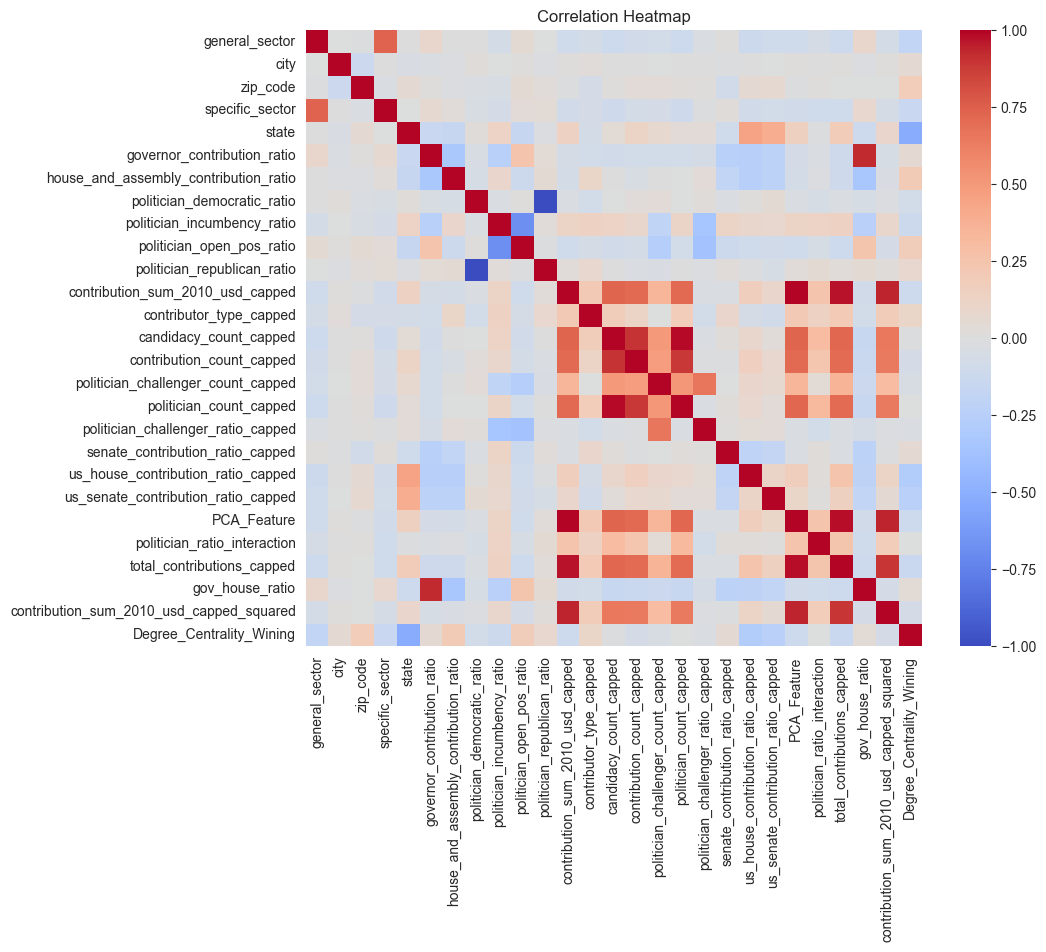

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = centralityMergedTraining.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [326]:
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and labels respectively
X_train, X_temp, y_train, y_temp = train_test_split(centralityMergedTraining, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [388]:
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=10)

# Train the model
xgb_model_1.fit(X_train, y_train)

# Predict on the test set
xgb_predictions_1 = xgb_model_1.predict(X_val)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_val, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")

XGBoost MSE: 0.07486192520794908


In [387]:
xgb_predictions_1 = xgb_model_1.predict(X_test)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_test, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")

XGBoost MSE: 0.07885974543478846


In [329]:
import xgboost as xgb
from xgboost import XGBRegressor

# Assuming train_data is your training dataset and 'target' is your target variable
# X_train = training_data.drop('target', axis=1)
# y_train = train_data['target']

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Select a threshold for feature importance (for example, the mean importance)
threshold = feature_importances.mean()

# Get the indices of important features
important_feature_indices = [index for index, importance in enumerate(feature_importances) if importance > threshold]

# Select the important features from the dataset
selected_features = X_train.columns[important_feature_indices]
X_train_selected = X_train[selected_features]

# If you're using this for model selection, you'd train a new model here:
model_selected_features = XGBRegressor()
model_selected_features.fit(X_train_selected, y_train)

# You can then save or output the selected features
selected_features_list = list(selected_features)


In [331]:
feature_importances

array([0.00877854, 0.00531467, 0.01357923, 0.00811063, 0.03676539,
       0.02856991, 0.01506158, 0.05914532, 0.4167721 , 0.0155556 ,
       0.        , 0.00851725, 0.01282123, 0.01138177, 0.01002767,
       0.00866513, 0.02129665, 0.11136864, 0.01354711, 0.04121696,
       0.020143  , 0.01666844, 0.00429544, 0.01063912, 0.06349845,
       0.        , 0.0382602 ], dtype=float32)

In [341]:
centralityMergedTraining.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'governor_contribution_ratio', 'house_and_assembly_contribution_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'contribution_sum_2010_usd_capped', 'contributor_type_capped',
       'candidacy_count_capped', 'contribution_count_capped',
       'politician_challenger_count_capped', 'politician_count_capped',
       'politician_challenger_ratio_capped',
       'senate_contribution_ratio_capped',
       'us_house_contribution_ratio_capped',
       'us_senate_contribution_ratio_capped', 'PCA_Feature',
       'politician_ratio_interaction', 'total_contributions_capped',
       'gov_house_ratio', 'contribution_sum_2010_usd_capped_squared',
       'Degree_Centrality_Wining'],
      dtype='object')

In [343]:
cols = ['zip_code',
        'state',
        'governor_contribution_ratio',
        'house_and_assembly_contribution_ratio',
        'politician_democratic_ratio',
        'politician_incumbency_ratio',
        'politician_open_pos_ratio',
        'contributor_type_capped',
        'candidacy_count_capped', 
        'contribution_count_capped',
        'politician_count_capped',
        'politician_challenger_ratio_capped',
        'senate_contribution_ratio_capped',
        'us_house_contribution_ratio_capped',
        'us_senate_contribution_ratio_capped',
        'politician_ratio_interaction',
        'gov_house_ratio', 
        'contribution_sum_2010_usd_capped_squared',
        'Degree_Centrality_Wining'
        ]
cols

['zip_code',
 'state',
 'governor_contribution_ratio',
 'house_and_assembly_contribution_ratio',
 'politician_democratic_ratio',
 'politician_incumbency_ratio',
 'politician_open_pos_ratio',
 'contributor_type_capped',
 'candidacy_count_capped',
 'contribution_count_capped',
 'politician_count_capped',
 'politician_challenger_ratio_capped',
 'senate_contribution_ratio_capped',
 'us_house_contribution_ratio_capped',
 'us_senate_contribution_ratio_capped',
 'politician_ratio_interaction',
 'gov_house_ratio',
 'contribution_sum_2010_usd_capped_squared',
 'Degree_Centrality_Wining']

In [354]:
centralityMergedTraining.corrwith(y)

general_sector                              0.003759
city                                       -0.001229
zip_code                                   -0.002105
specific_sector                             0.002763
state                                      -0.001172
governor_contribution_ratio                 0.003370
house_and_assembly_contribution_ratio       0.000598
politician_democratic_ratio                -0.000115
politician_incumbency_ratio                 0.003195
politician_open_pos_ratio                  -0.002621
politician_republican_ratio                 0.000115
contribution_sum_2010_usd_capped            0.002198
contributor_type_capped                    -0.000993
candidacy_count_capped                      0.004577
contribution_count_capped                   0.003848
politician_challenger_count_capped          0.000539
politician_count_capped                     0.004414
politician_challenger_ratio_capped         -0.000510
senate_contribution_ratio_capped           -0.

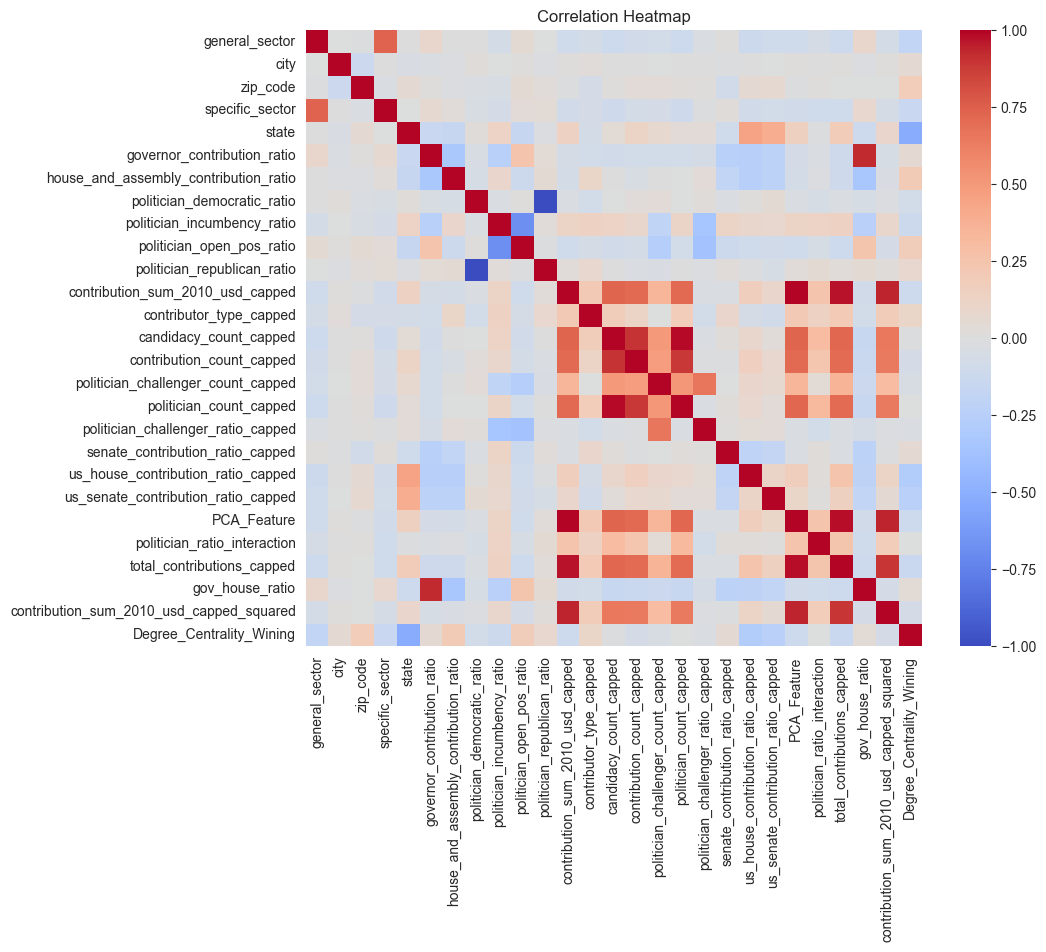

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = centralityMergedTraining.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [346]:
training_data_special = centralityMergedTraining[cols]
test_data_special = test_final[cols]

In [347]:
X_train, X_temp, y_train, y_temp = train_test_split(training_data_special, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [390]:
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=10)

# Train the model
xgb_model_1.fit(X_train, y_train)

# Predict on the test set
xgb_predictions_1 = xgb_model_1.predict(X_val)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_val, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")

XGBoost MSE: 0.07447812023680428


In [389]:
xgb_predictions_1 = xgb_model_1.predict(X_test)

# Calculate MSE
xgb_mse_1 = mean_squared_error(y_test, xgb_predictions_1)
print(f"XGBoost MSE: {xgb_mse_1}")

XGBoost MSE: 0.07736879525819362


In [ ]:
cols_to_remove = [#'candidacy_count',
 'candidacy_democratic_count',
 'candidacy_republican_count',
 #'contribution_count',
 'contribution_democratic_count',
 'contribution_republican_count',
 #'politician_count',
 'politician_democratic_count',
 'politician_incumbency_count',
 'politician_open_pos_count',
 'politician_republican_count']

In [ ]:
cols_to_remove_updated = [
    'contribution_democratic_sum_2010_usd',
    'contribution_republican_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd'
]

In [408]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_val, y_train, y_val are your training and validation sets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Define the parameters for the model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',  # 'l2' is synonymous with 'mse'
    'num_leaves': 33,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.6,
    'bagging_freq': 8,
    'verbose': 0
}

# Train the model with early stopping
gbm = lgb.train(params,
                train_data,
                num_boost_round=2000,
                valid_sets=[val_data])  # This will print the evaluation result every 100 iterations

# Predict on the validation set using the best iteration
y_pred_val = gbm.predict(X_val, num_iteration=gbm.best_iteration)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')


Mean Squared Error on Validation Set: 0.07621245945307903


In [409]:
y_pred_val = gbm.predict(X_test)
mse_val = mean_squared_error(y_test, y_pred_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')


Mean Squared Error on Validation Set: 0.07945261024883485
